
Epoch 1/20
Batch 1/298 ━━━━━━━━━━━━━━━━━━━━ 22:44:29
Accuracy: 0.3382 - Precision: 0.0266 - Recall: 0.6902 - Specificity: 0.3289 - F1: 0.0512 - Loss: 0.3689

Batch 2/298 ━━━━━━━━━━━━━━━━━━━━ 22:44:41
Accuracy: 0.4263 - Precision: 0.0254 - Recall: 0.5872 - Specificity: 0.4220 - F1: 0.0486 - Loss: 0.2591

Batch 3/298 ━━━━━━━━━━━━━━━━━━━━ 22:44:52
Accuracy: 0.6056 - Precision: 0.0169 - Recall: 0.3915 - Specificity: 0.6139 - F1: 0.0324 - Loss: 0.1824

Batch 4/298 ━━━━━━━━━━━━━━━━━━━━ 22:45:03
Accuracy: 0.6985 - Precision: 0.0127 - Recall: 0.2936 - Specificity: 0.7104 - F1: 0.0243 - Loss: 0.1436

Batch 5/298 ━━━━━━━━━━━━━━━━━━━━ 22:45:16
Accuracy: 0.7549 - Precision: 0.0102 - Recall: 0.2349 - Specificity: 0.7683 - F1: 0.0194 - Loss: 0.1212

Batch 6/298 ━━━━━━━━━━━━━━━━━━━━ 22:45:28
Accuracy: 0.7925 - Precision: 0.0085 - Recall: 0.1957 - Specificity: 0.8069 - F1: 0.0162 - Loss: 0.1062

Batch 7/298 ━━━━━━━━━━━━━━━━━━━━ 22:45:44
Accuracy: 0.8194 - Precision: 0.0073 - Recall: 0.1678 - Specific

Error loading image or mask: [Errno 2] No such file or directory: 'C:\\Users\\Jaber\\OneDrive - University of Florida\\Educational\\GitHub\\Datasets\\ImageSegmentation\\Dental_XRay_Computacional_Vision_Segmentation\\Dental X_Ray\\test\\2928980000-jpg_png_jpg.rf.9edde711278fda040d0b55d35f33166f.jpg'
Error loading image or mask: [Errno 2] No such file or directory: 'C:\\Users\\Jaber\\OneDrive - University of Florida\\Educational\\GitHub\\Datasets\\ImageSegmentation\\Dental_XRay_Computacional_Vision_Segmentation\\Dental X_Ray\\test\\3061010000-jpg_png_jpg.rf.663ef7f9b69cf6866024163576819e47.jpg'
Error loading image or mask: [Errno 2] No such file or directory: 'C:\\Users\\Jaber\\OneDrive - University of Florida\\Educational\\GitHub\\Datasets\\ImageSegmentation\\Dental_XRay_Computacional_Vision_Segmentation\\Dental X_Ray\\test\\2939710000-jpg_png_jpg.rf.8fb9d5a77d7f6e30bdd8b93e0b50cfff.jpg'
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Error loading image or mask: [Errno 2] No such file or directory

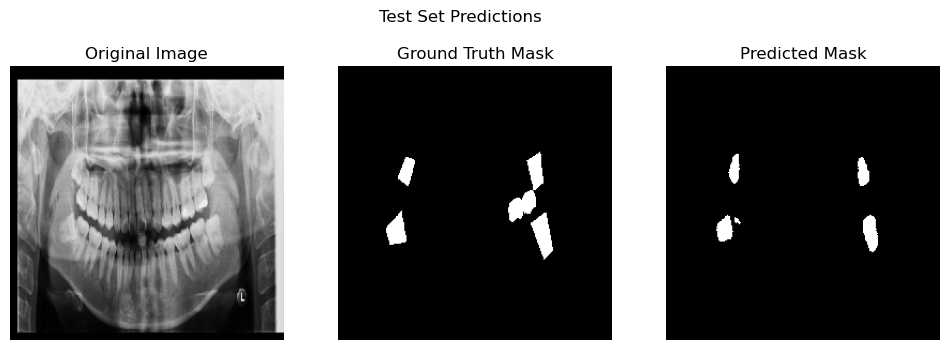

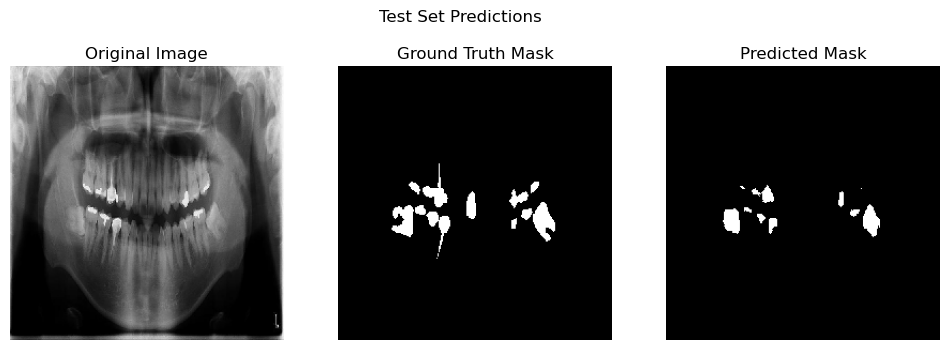

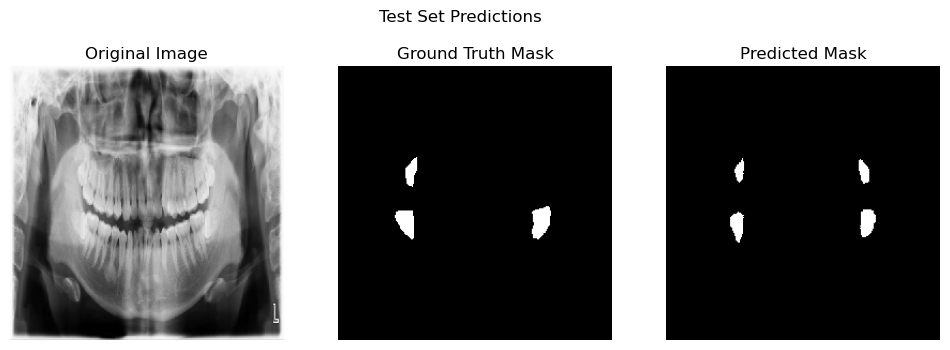

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

# Directory paths
train_img_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\train"
train_mask_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\ImageSegmentation\Datasets\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\train\train_mask"
valid_img_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\valid"
valid_mask_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\ImageSegmentation\Datasets\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\valid\valid_mask"
test_img_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\test"
test_mask_dir = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\ImageSegmentation\Datasets\Dental_XRay_Computacional_Vision_Segmentation\Dental X_Ray\test\test_mask"

# Paths to annotation files
train_annotation_file = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\train_annotations.coco.json"
valid_annotation_file = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\valid_annotations.coco.json"
test_annotation_file = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\GitHub\Datasets\ImageSegmentation\Dental_XRay_Computacional_Vision_Segmentation\test_annotations.coco.json"

# Function to load annotations
def load_annotations(json_path):
    import json
    with open(json_path, 'r') as f:
        annotations = json.load(f)
    return annotations

# Load annotations
train_annotations = load_annotations(train_annotation_file)
valid_annotations = load_annotations(valid_annotation_file)
test_annotations = load_annotations(test_annotation_file)

# Image generator to load data in batches using annotations
def image_generator(img_dir, mask_dir, annotations, batch_size, img_size=(256, 256)):
    image_info = annotations['images']
    while True:
        np.random.shuffle(image_info)
        for batch_start in range(0, len(image_info), batch_size):
            images = []
            masks = []
            for i in range(batch_start, min(batch_start + batch_size, len(image_info))):
                image_data = image_info[i]
                image_filename = image_data['file_name']
                img_path = os.path.join(img_dir, image_filename)
                mask_filename = f"{image_filename}_mask.png"
                mask_path = os.path.join(mask_dir, mask_filename)
                try:
                    # Load image and mask
                    img = load_img(img_path, color_mode='rgb', target_size=img_size)
                    img = img_to_array(img) / 255.0
                    mask = load_img(mask_path, color_mode='grayscale', target_size=img_size)
                    mask = img_to_array(mask) / 255.0

                    images.append(img)
                    masks.append(mask)
                except (FileNotFoundError, ValueError) as e:
                    print(f"Error loading image or mask: {e}")
                    continue

            if len(images) > 0:
                yield np.array(images), np.array(masks)

# VGG16-based model replacing U-Net
def vgg16_unet_model(input_size=(256, 256, 3)):
    # Load VGG16 as the encoder with pre-trained ImageNet weights
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=input_size)
    
    # Freeze VGG16 layers to prevent them from being trained
    for layer in vgg16.layers:
        layer.trainable = False
    
    # Extract layers for skip connections
    block1 = vgg16.get_layer('block1_pool').output   # 128x128
    block2 = vgg16.get_layer('block2_pool').output   # 64x64
    block3 = vgg16.get_layer('block3_pool').output   # 32x32
    block4 = vgg16.get_layer('block4_pool').output   # 16x16
    block5 = vgg16.get_layer('block5_pool').output   # 8x8
    
    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(block5)  # 16x16
    u6 = layers.concatenate([u6, block4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    
    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)  # 32x32
    u7 = layers.concatenate([u7, block3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    
    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)  # 64x64
    u8 = layers.concatenate([u8, block2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    
    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)    # 128x128
    u9 = layers.concatenate([u9, block1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    
    # Final upsampling to reach original image size
    u10 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c9)  # 256x256
    c10 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u10)
    c10 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c10)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c10)
    
    model = models.Model(inputs=vgg16.input, outputs=outputs)
    
    return model

# Define custom metrics
def custom_precision(y_true, y_pred):
    y_pred_bin = K.round(y_pred)
    true_positives = K.sum(K.round(y_true * y_pred_bin))
    predicted_positives = K.sum(y_pred_bin)
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def custom_recall(y_true, y_pred):
    y_pred_bin = K.round(y_pred)
    true_positives = K.sum(K.round(y_true * y_pred_bin))
    possible_positives = K.sum(y_true)
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def custom_specificity(y_true, y_pred):
    y_pred_bin = K.round(y_pred)
    true_negatives = K.sum(K.round((1 - y_true) * (1 - y_pred_bin)))
    possible_negatives = K.sum(1 - y_true)
    specificity = true_negatives / (possible_negatives + K.epsilon())
    return specificity

def custom_f1(y_true, y_pred):
    precision = custom_precision(y_true, y_pred)
    recall = custom_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

# Define Focal Loss
def focal_loss_fixed(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
    weight = alpha * y_true * K.pow((1 - y_pred), gamma) + (1 - alpha) * (1 - y_true) * K.pow(y_pred, gamma)
    loss = weight * cross_entropy
    return K.mean(loss)

# Compile the model
model = vgg16_unet_model()
model.compile(optimizer='adam', loss=focal_loss_fixed, metrics=['accuracy', custom_precision, custom_recall, custom_specificity, custom_f1])

# Batch size for training
batch_size = 16

# Create data generators using annotations
train_gen = image_generator(train_img_dir, train_mask_dir, train_annotations, batch_size)
valid_gen = image_generator(valid_img_dir, valid_mask_dir, valid_annotations, batch_size)
test_gen = image_generator(test_img_dir, test_mask_dir, test_annotations, batch_size)

# Number of steps per epoch
steps_per_epoch = len(train_annotations['images']) // batch_size
validation_steps = len(valid_annotations['images']) // batch_size
test_steps = len(test_annotations['images']) // batch_size

# Custom callback to print more metrics at each batch and epoch for training, validation, and test sets
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, total_batches, validation_data):
        super().__init__()
        self.batch_counter = 1
        self.total_batches = total_batches
        self.current_epoch = 1
        self.validation_data = validation_data

    def on_epoch_begin(self, epoch, logs=None):
        self.current_epoch = epoch + 1
        print(f"\nEpoch {self.current_epoch}/{self.params['epochs']}")

    def on_batch_end(self, batch, logs=None):
        logs = logs or {}
        accuracy = logs.get('accuracy', 0)
        loss = logs.get('loss', 0)
        precision = logs.get('custom_precision', 0)
        recall = logs.get('custom_recall', 0)
        f1 = logs.get('custom_f1', 0)
        specificity = logs.get('custom_specificity', 0)
        current_time = datetime.now().strftime("%H:%M:%S")
        print(f"Batch {self.batch_counter}/{self.total_batches} ━━━━━━━━━━━━━━━━━━━━ {current_time}")
        print(f"Accuracy: {accuracy:.4f} - Precision: {precision:.4f} - Recall: {recall:.4f} - Specificity: {specificity:.4f} - F1: {f1:.4f} - Loss: {loss:.4f}\n")
        self.batch_counter += 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        accuracy = logs.get('accuracy', 0)
        val_accuracy = logs.get('val_accuracy', 0)
        loss = logs.get('loss', 0)
        val_loss = logs.get('val_loss', 0)
        precision = logs.get('custom_precision', 0)
        val_precision = logs.get('val_custom_precision', 0)
        recall = logs.get('custom_recall', 0)
        val_recall = logs.get('val_custom_recall', 0)
        f1 = logs.get('custom_f1', 0)
        val_f1 = logs.get('val_custom_f1', 0)
        specificity = logs.get('custom_specificity', 0)
        val_specificity = logs.get('val_custom_specificity', 0)
        print(f"Epoch {epoch+1}/{self.params['epochs']}")
        print(f"Train - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Specificity: {specificity:.4f}, F1: {f1:.4f}, Loss: {loss:.4f}")
        print(f"Validation - Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, Specificity: {val_specificity:.4f}, F1: {val_f1:.4f}, Loss: {val_loss:.4f}\n")
        self.batch_counter = 1

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize the custom callback with validation data
metrics_callback = MetricsCallback(total_batches=steps_per_epoch, validation_data=valid_gen)

# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=valid_gen,
    validation_steps=validation_steps,
    callbacks=[metrics_callback, early_stopping],
    verbose=0
)

# Save the model
model.save('dental_xray_vgg16_unet_model.h5')

# Evaluate on the test set **only after training is fully completed**
y_test_true = []
y_test_pred = []

for _ in range(test_steps):
    X_batch, y_batch = next(test_gen)
    y_pred_batch = model.predict(X_batch)
    y_pred_batch_bin = (y_pred_batch > 0.5).astype(np.uint8)
    y_test_true.extend(y_batch.flatten())
    y_test_pred.extend(y_pred_batch_bin.flatten())

# Convert lists to numpy arrays
y_test_true = np.array(y_test_true)
y_test_pred = np.array(y_test_pred)

# Calculate metrics
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred)
test_recall = recall_score(y_test_true, y_test_pred)
test_specificity = recall_score(y_test_true, y_test_pred, pos_label=0)
test_f1 = f1_score(y_test_true, y_test_pred)

print(f"Test Set Results - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, Specificity: {test_specificity:.4f}, F1: {test_f1:.4f}")

# Visualization: Show input image, true mask, and predicted mask for TEST set only
def visualize_predictions(images, true_masks, pred_masks, title):
    for i in range(3):  # Visualize first 3 predictions
        plt.figure(figsize=(12, 4))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(images[i].squeeze())
        plt.title('Original Image')
        plt.axis('off')
        
        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')
        
        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(pred_masks[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')
        
        plt.suptitle(title)
        plt.show()

# Generate a batch from the test set for visualization
X_test_batch, y_test_batch = next(test_gen)
y_test_pred_batch = model.predict(X_test_batch)
y_test_pred_batch_bin = (y_test_pred_batch > 0.5).astype(np.uint8)

# Visualize predictions for test set only
visualize_predictions(X_test_batch, y_test_batch, y_test_pred_batch_bin, "Test Set Predictions")
